In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as stats 

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PowerTransformer

from sklearn.metrics import r2_score

In [29]:
df=pd.read_csv("concrete_data.csv")
df.sample(5)

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
59,332.5,142.5,0.0,228.0,0.0,932.0,594.0,28,33.02
573,316.1,210.7,0.0,185.7,0.0,977.0,689.3,28,38.70
309,295.7,0.0,95.6,171.5,8.9,955.1,859.2,3,22.95
907,314.0,145.0,113.0,179.0,8.0,869.0,690.0,28,46.23
423,172.4,13.6,172.4,156.8,4.1,1006.3,856.4,14,29.75


# Dist Plot and QQplot before transformation

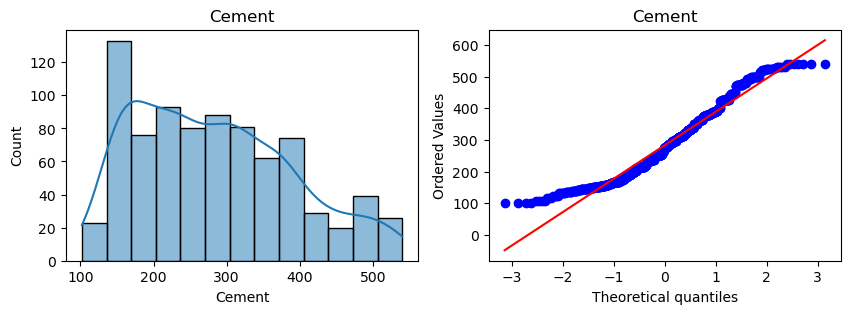

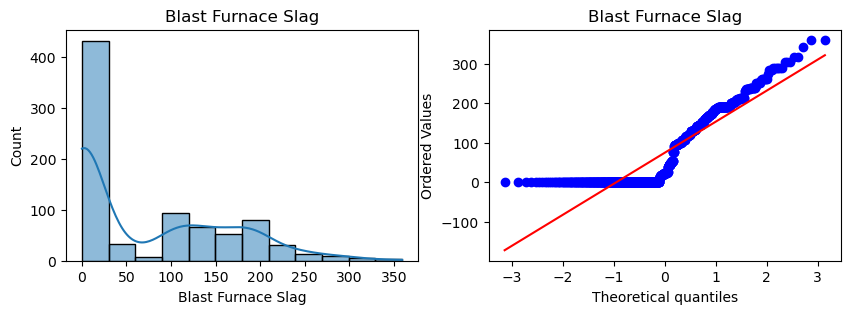

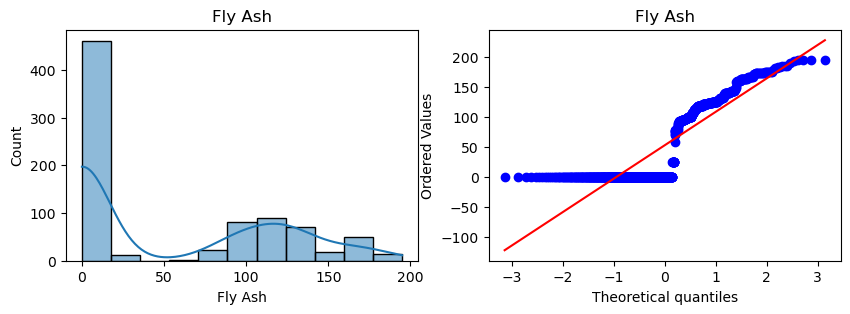

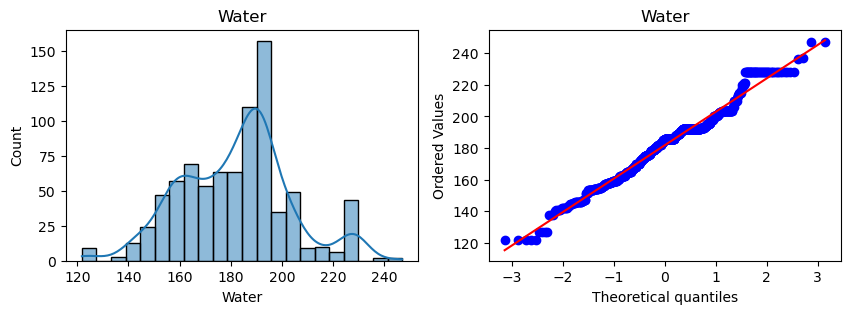

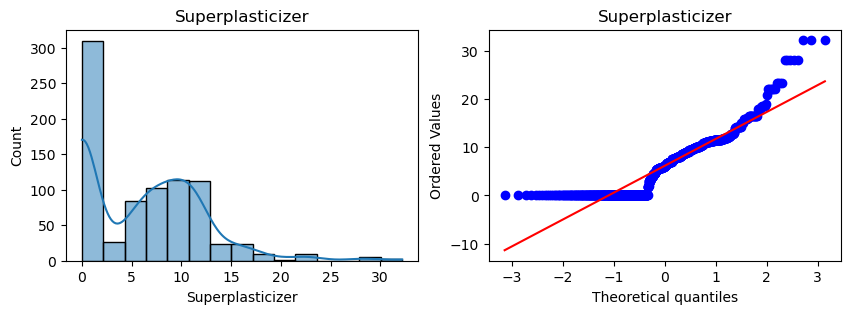

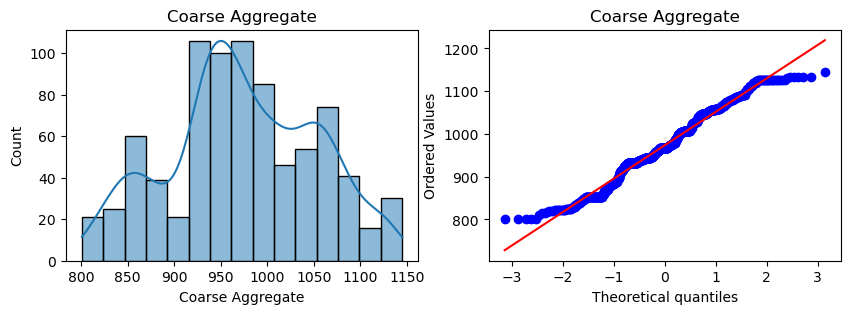

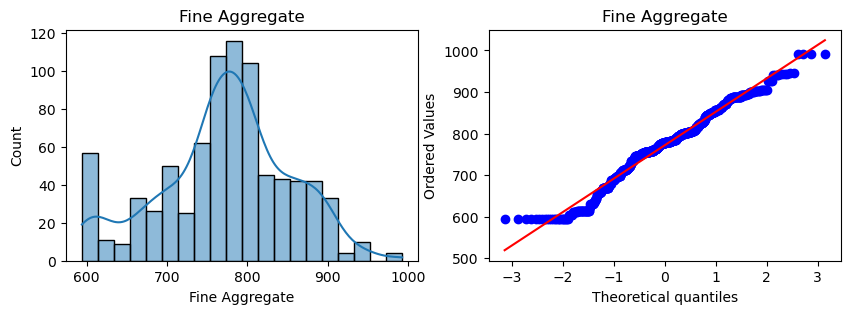

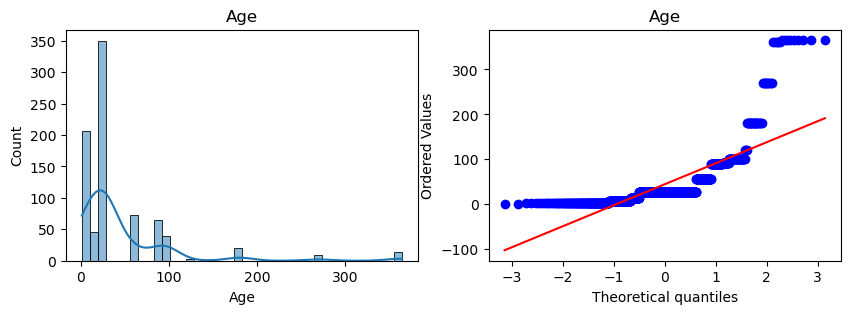

In [30]:
for column in X_train.columns:
    plt.figure(figsize=(10,3))

    plt.subplot(121)
    sns.histplot(X_train[column], kde=True) 
    plt.title(column)

    plt.subplot(122)
    stats.probplot(X_train[column], dist="norm", plot=plt)
    plt.title(column)
    plt.show()

# Train Test Split

In [31]:
x=df.drop(columns=["Strength"])
y=df[["Strength"]]
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

# Testing without transformation

In [32]:
lr=LinearRegression()

lr.fit(X_train,y_train)
y_pred= lr.predict(X_test)
r2_score(y_test,y_pred)

0.627553179231485

# Cross Val Score without transformation

In [33]:
lr=LinearRegression()
np.mean(cross_val_score(lr,x,y,scoring="r2"))

np.float64(0.4609940491662866)

# Applying Box-Cox Transformer

In [34]:
pt=PowerTransformer(method="box-cox")

X_train_transformed=pt.fit_transform(X_train+0.0000001)
X_test_transformed=pt.transform(X_test+0.0000001)

pd.DataFrame({'cols':X_train.columns, 'box-cox lambdas':pt.lambdas_}) #lambda values for each column

,cols,box-cox lambdas
0,Cement,0.177025
1,Blast Furnace Slag,0.022767
2,Fly Ash,-0.034635
3,Water,0.772682
4,Superplasticizer,0.087141
5,Coarse Aggregate,1.129813
6,Fine Aggregate,1.782018
7,Age,0.066631


# Accuracy Score

In [35]:
lr=LinearRegression()
lr.fit(X_train_transformed,y_train)

y_pred2=lr.predict(X_test_transformed)

r2_score(y_test, y_pred2)

0.8042534513415571

# Cross Val Score (Box-Cox)

In [36]:
pt=PowerTransformer()
X_transformed=pt.fit_transform(x+0.0000001)

lr=LinearRegression()
np.mean(cross_val_score(lr,X_transformed,y,scoring="r2"))

np.float64(0.6834625147585042)

# Before VS After Hist Plot

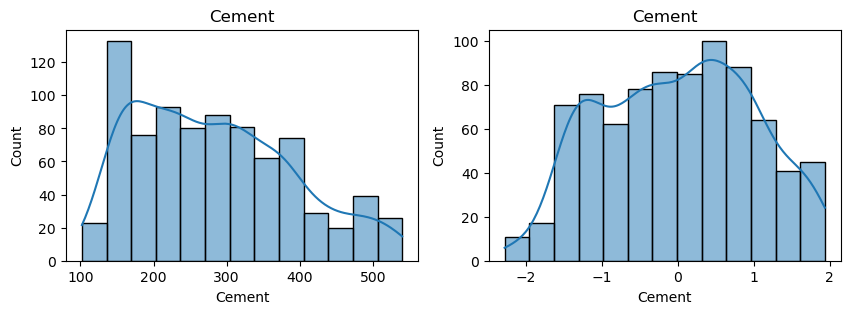

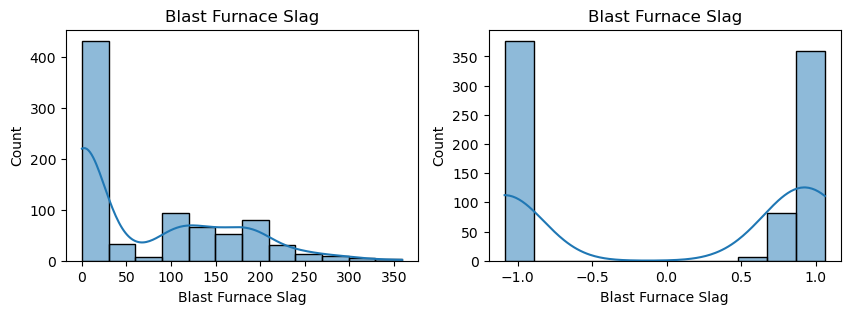

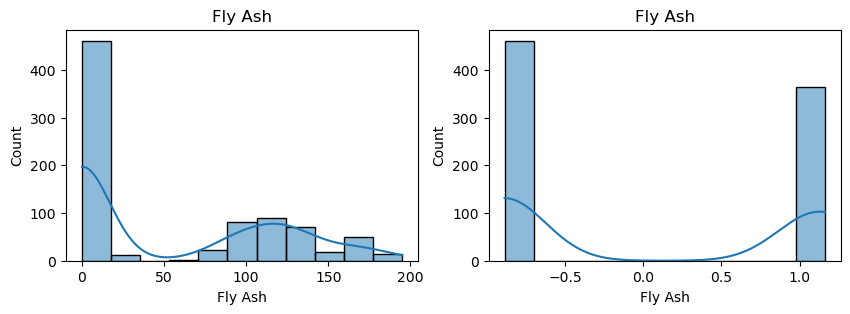

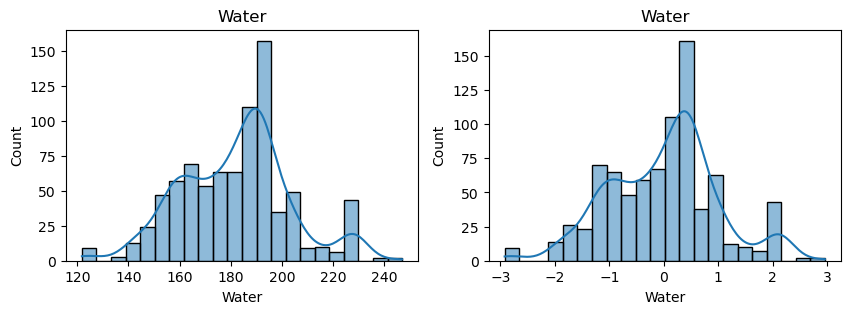

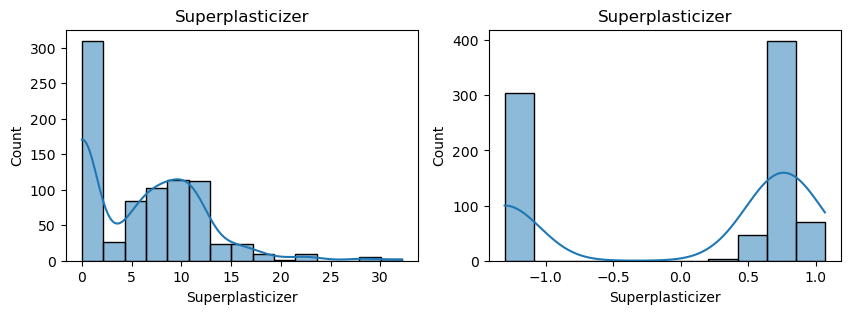

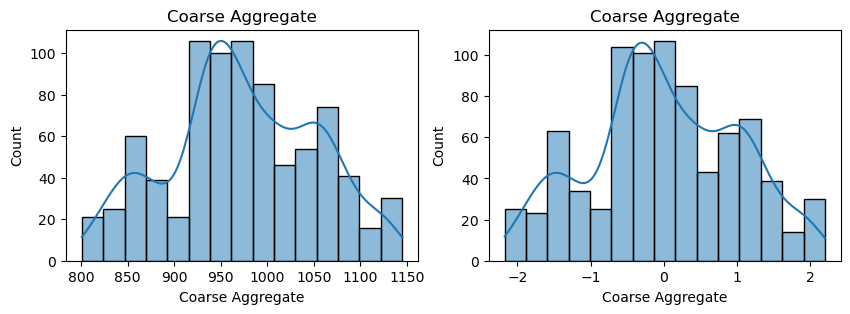

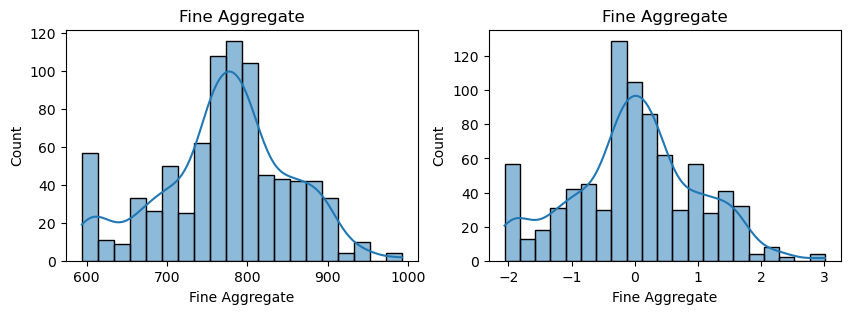

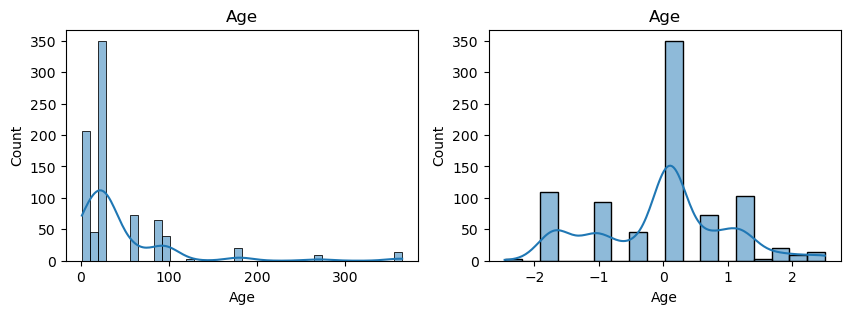

In [37]:
X_train_transformed1=pd.DataFrame(X_train_transformed,columns=X_train.columns)
for column in X_train.columns:
    plt.figure(figsize=(10,3))

    plt.subplot(121)
    sns.histplot(X_train[column], kde=True) 
    plt.title(column)

    plt.subplot(122)
    sns.histplot(X_train_transformed1[column], kde=True) 
    plt.title(column)
    plt.show()

# Before VS After QQplot

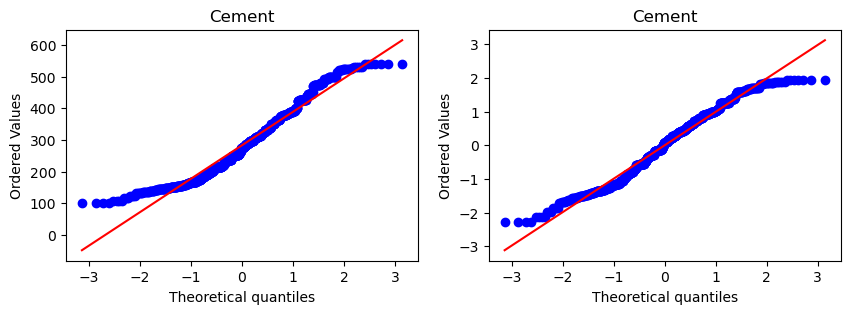

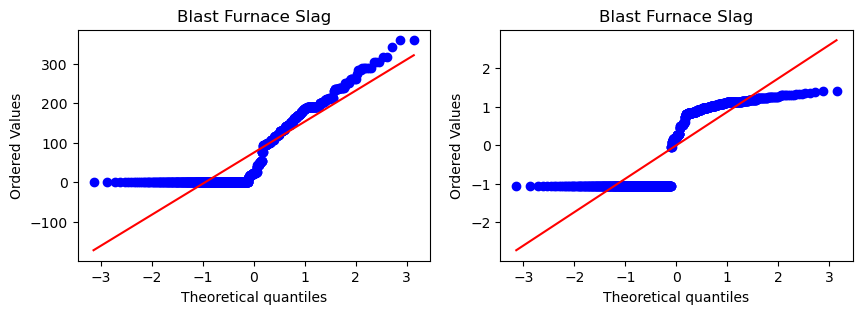

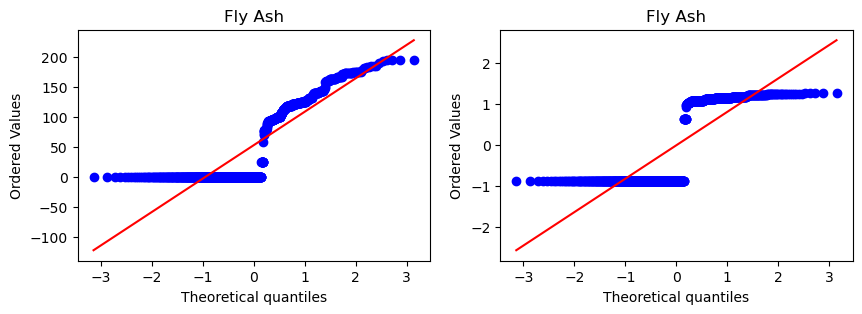

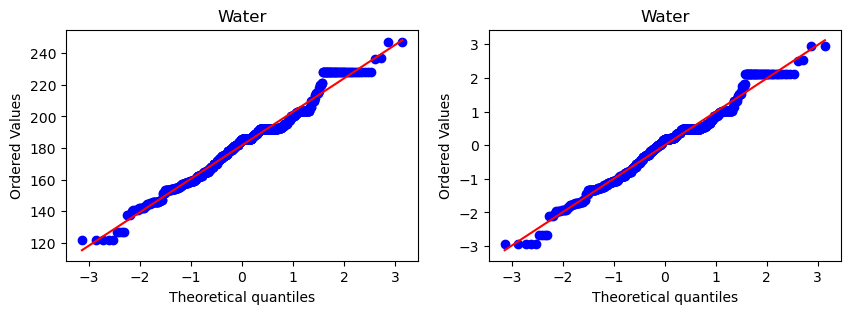

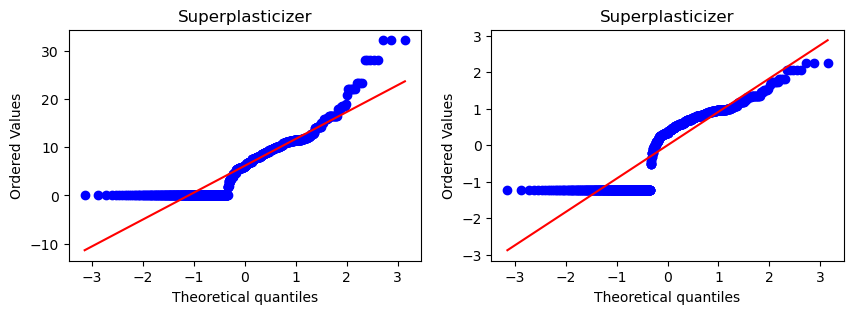

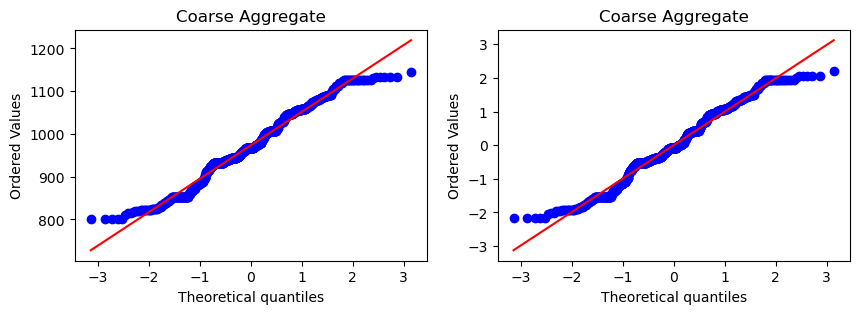

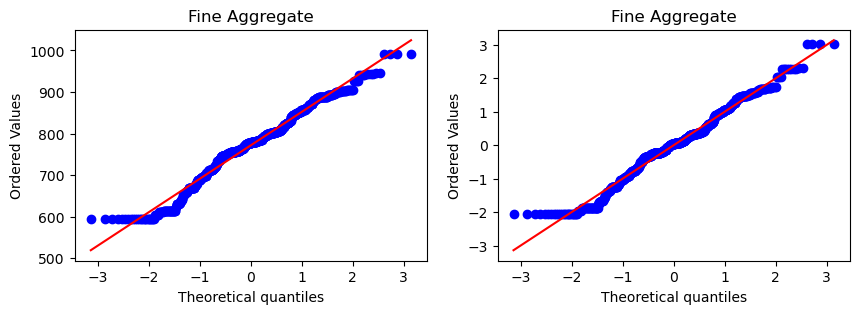

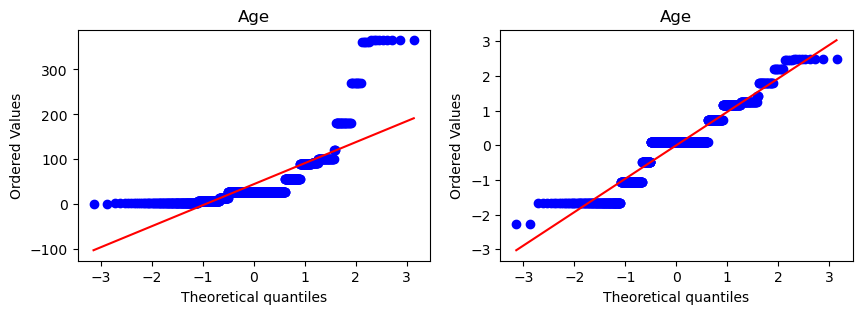

In [67]:
for column in X_train.columns:
    plt.figure(figsize=(10,3))

    plt.subplot(121)
    stats.probplot(X_train[column], dist="norm", plot=plt)
    plt.title(column)

    plt.subplot(122)
    stats.probplot(X_train_transformed1[column], dist="norm", plot=plt)
    plt.title(column)
    plt.show()